D:\Oracle\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Oracle\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

D:\Oracle\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Oracle\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

Best k value: 1


D:\Oracle\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy on training set: 1.0
Accuracy on test set: 0.9987694831829368


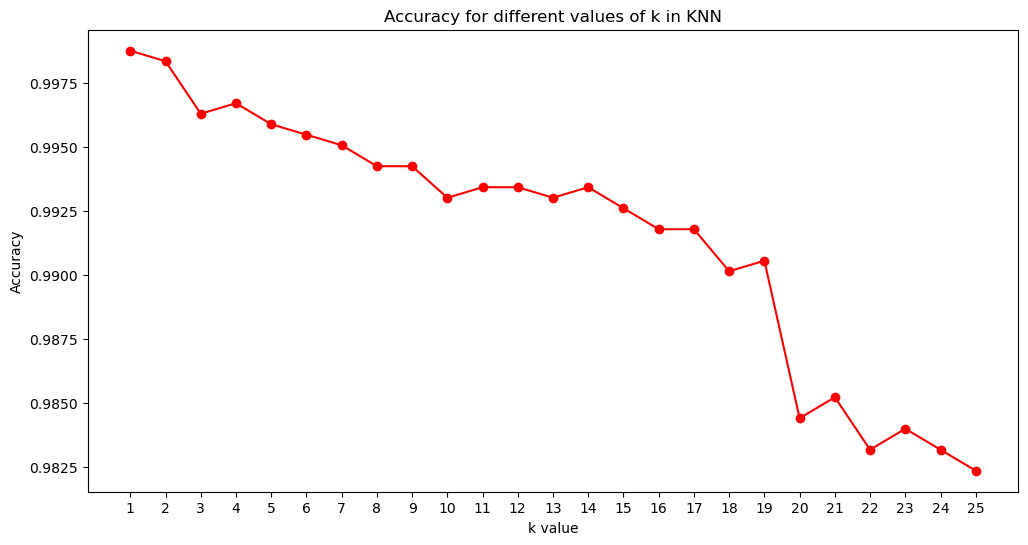

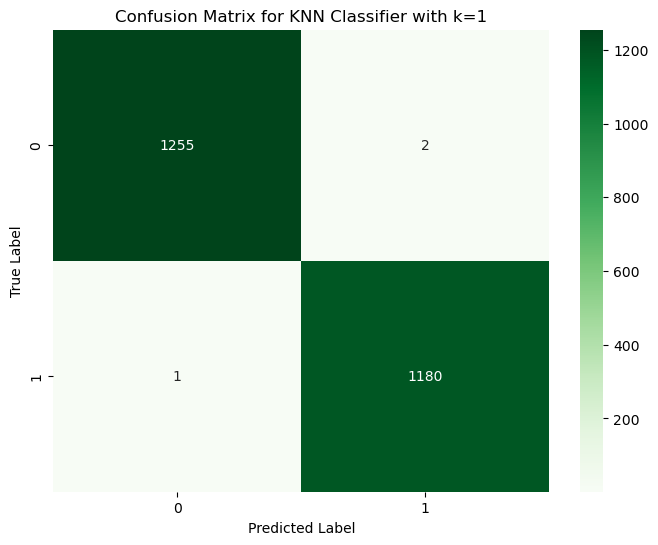

D:\Oracle\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


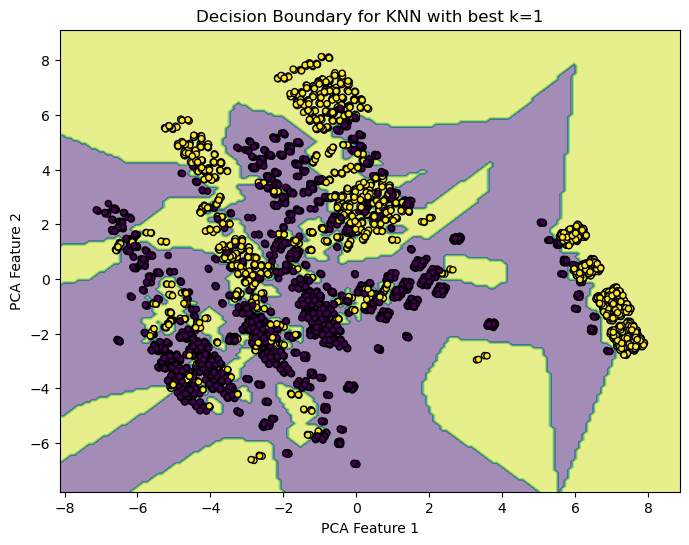

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Load the dataset
file_path = 'mushrooms.csv'  # Replace with your file path
mushrooms_data = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
for column in mushrooms_data.columns:
    label_encoders[column] = LabelEncoder()
    mushrooms_data[column] = label_encoders[column].fit_transform(mushrooms_data[column])

# Splitting the dataset into training and testing sets
X = mushrooms_data.drop('class', axis=1)
y = mushrooms_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# K-Nearest Neighbors Classifier - finding the best k
k_values = range(1, 26)
accuracies = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    knn_predictions = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, knn_predictions)
    accuracies.append(accuracy)

# Evaluate the model with best k
best_k = accuracies.index(max(accuracies)) + 1
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(X_train, y_train)
best_knn_predictions = best_knn_classifier.predict(X_test)
best_knn_accuracy = accuracy_score(y_test, best_knn_predictions)
best_knn_classification_report = classification_report(y_test, best_knn_predictions)
best_knn_confusion_matrix = confusion_matrix(y_test, best_knn_predictions)
# Print performance
print(f"Best k value: {best_k}")
print(f"Accuracy on training set: {best_knn_classifier.score(X_train, y_train)}")
print(f"Accuracy on test set: {best_knn_accuracy}")
# Plotting accuracy for different k values
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, color='red', marker='o')
plt.title('Accuracy for different values of k in KNN')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

# Plot Confusion Matrix for Best k
plt.figure(figsize=(8, 6))
sns.heatmap(best_knn_confusion_matrix, annot=True, fmt="d", cmap="Greens")
plt.title(f"Confusion Matrix for KNN Classifier with k={best_k}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# PCA for dimensionality reduction to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Re-fit the best KNN classifier on the 2D projected training data
best_knn_classifier_pca = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier_pca.fit(X_train_pca, y_train)

# Plot decision boundary for the best k
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = best_knn_classifier_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Color plot for decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Decision Boundary for KNN with best k={best_k}")
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()
